In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv("C:/Users/sherv/Downloads/titanic/train.csv")

In [4]:
# Basic exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

C:\Users\sherv\AppData\Local\Temp\ipykernel_25168\1381856062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2')


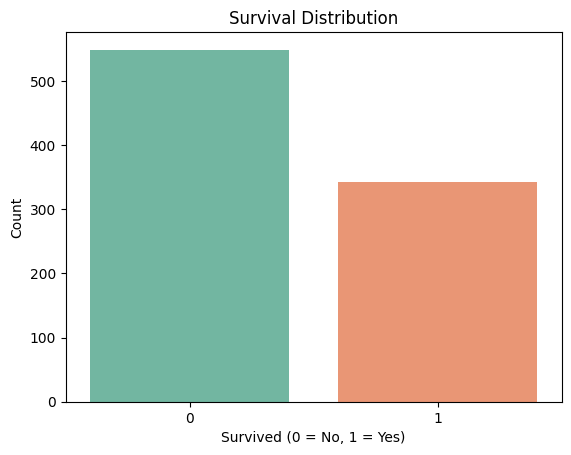

In [5]:
# Plot 1: Survival Countplot
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

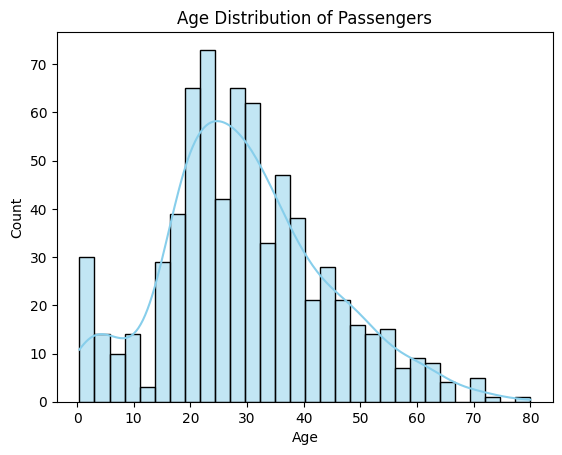

In [6]:
# Plot 2: Age Distribution
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

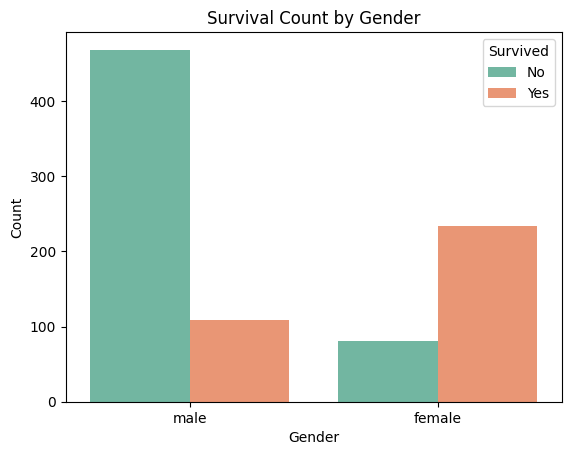

In [7]:
# Plot 3: Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

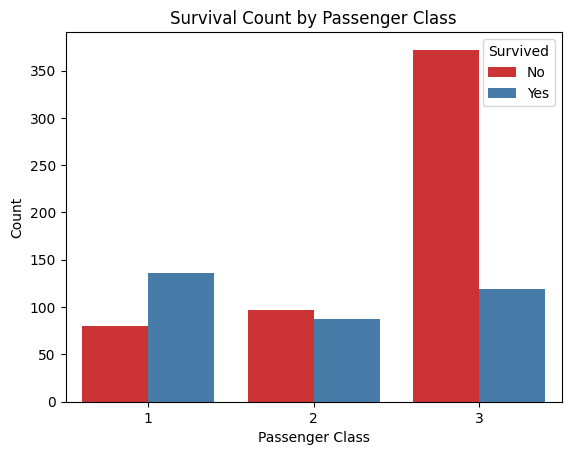

In [8]:
# Plot 4: Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

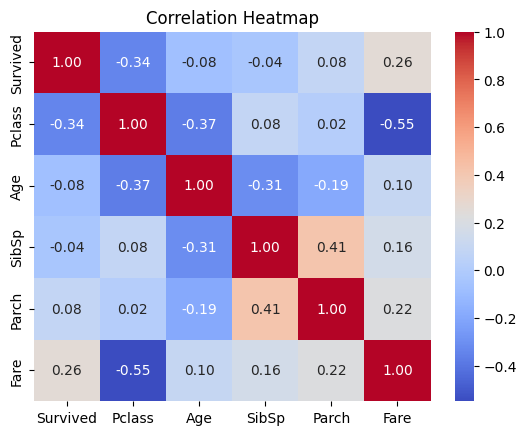

In [9]:
# Plot 5: Correlation Heatmap
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\sherv\AppData\Local\Temp\ipykernel_25168\3488772970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')


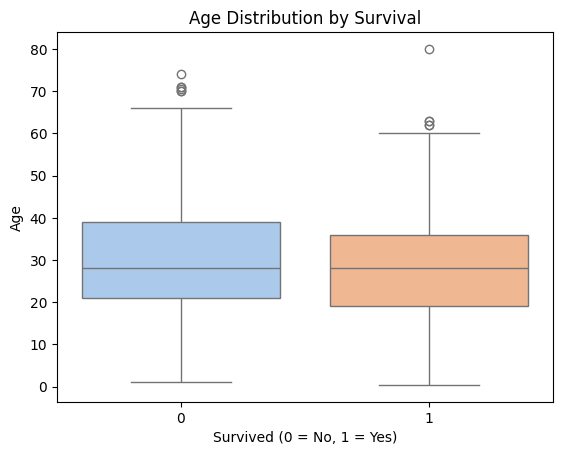

In [11]:
# Plot 6: Boxplot of Age by Survival
sns.boxplot(x='Survived', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

In [12]:
# Plot 7: Value Counts of Categorical Features
print("Embarked Value Counts:")
print(df['Embarked'].value_counts())

# Value counts for Pclass
print("\nPassenger Class Counts:")
print(df['Pclass'].value_counts())

# Value counts for Sex
print("\nGender Counts:")
print(df['Sex'].value_counts())


Embarked Value Counts:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Passenger Class Counts:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Gender Counts:
Sex
male      577
female    314
Name: count, dtype: int64


C:\Users\sherv\AppData\Local\Temp\ipykernel_25168\858148467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='Blues')


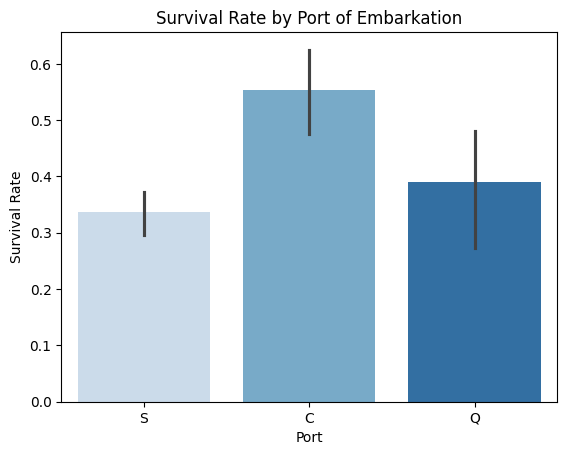

In [14]:
# Plot 8: Survival Rate by Embarked Port
sns.barplot(x='Embarked', y='Survived', data=df, palette='Blues')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port')
plt.ylabel('Survival Rate')
plt.show()

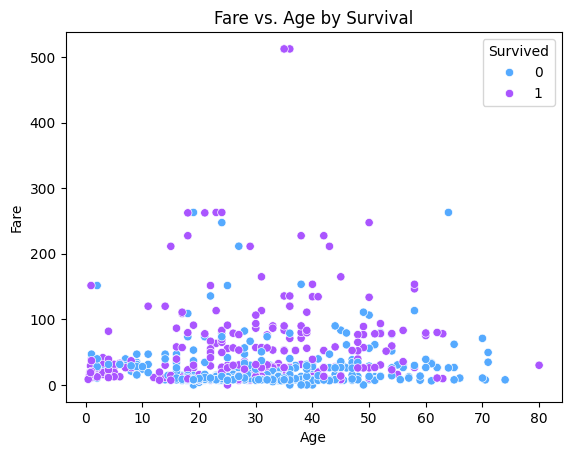

In [15]:
# Plot 9: Scatterplot of Fare vs Age (colored by Survival)
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='cool')
plt.title('Fare vs. Age by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

C:\Users\sherv\AppData\Local\Temp\ipykernel_25168\1253536230.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, palette='Set2')


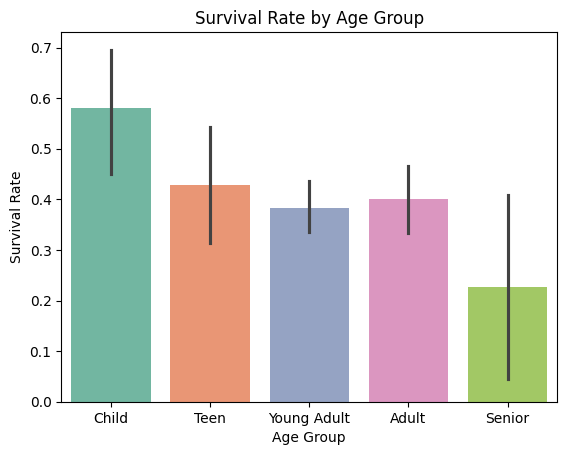

In [16]:
#Plot 10: Survival Rate by Age Group
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Barplot of survival by age group
sns.barplot(x='AgeGroup', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [17]:
#Plot 11: Grouped Survival Rate Table
# Grouped survival stats
grouped = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("Survival Rate by Class and Gender:")
print(grouped)


Survival Rate by Class and Gender:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


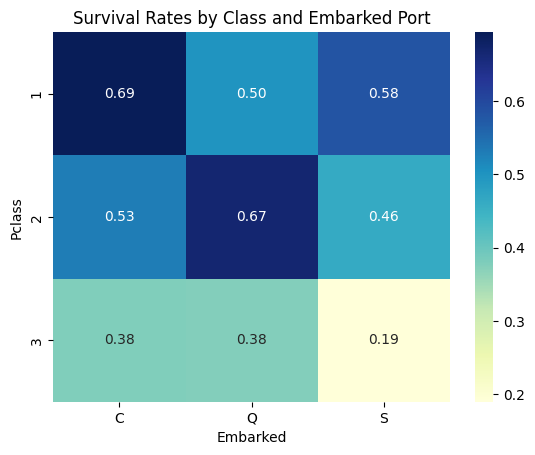

In [18]:
#Plot 12: Heatmap of Survival Rates by Class & Embarked
# Pivot table for heatmap
pivot_table = df.pivot_table(index='Pclass', columns='Embarked', values='Survived')

# Heatmap
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Survival Rates by Class and Embarked Port')
plt.show()


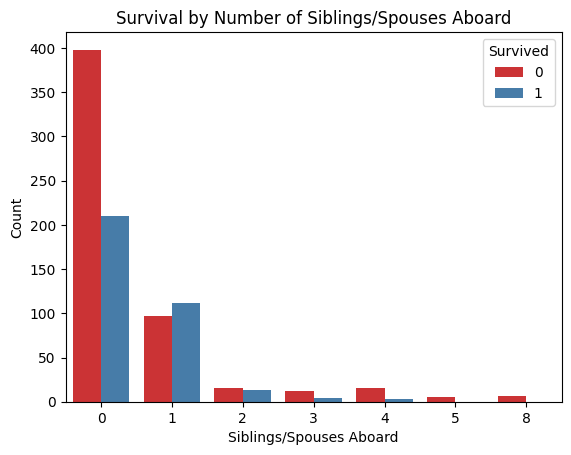

In [19]:
#Plot 13: Countplot: Siblings/Spouses Aboard vs Survival
sns.countplot(data=df, x='SibSp', hue='Survived', palette='Set1')
plt.title('Survival by Number of Siblings/Spouses Aboard')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.show()